In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='Malgun Gothic')
print(plt.rcParams['font.family'])



['Malgun Gothic']


In [125]:
file_path = 'C:/users/juwon/practice_aiffel/data_analysis_basic/'

entry_data = pd.read_csv(file_path + 'entry_data.csv')
sales_data = pd.read_csv(file_path + 'sales_data.csv')
item_data = pd.read_csv(file_path + 'item_data.csv')
item_entry_data = pd.read_csv(file_path + 'item_entry_data.csv')

In [126]:
# entry_data 데이터 정보 확인하기
entry_data.head()

,요금제명,입실,퇴실,이용,위치,금액,구분,고객
0,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
1,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
2,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
3,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
4,한국대생 무제한 입장권,2022-04-01 19:54,2022-04-01 22:28,오전 2:33:00,선불기2,7400,퇴실,customer388928


In [127]:
# sales_data 데이터 정보 확인하기
sales_data.head()

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer275507
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,"4,000",customer275507
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,"1,000",customer275507
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,"5,000",customer275507


In [128]:
# item_data 데이터 정보 확인하기
item_data.head()

,구분,분류,상품명,판매금액
0,1,게임&TV,이어폰(커널형),"3,000원"
1,2,디저트,초코머핀,"3,500원"
2,3,디저트,쿠키(초코칩),"1,500원"
3,4,디저트,쿠키(마카다미아),"1,500원"
4,5,디저트,미니마카롱(3개),"2,000원"


In [129]:
item_entry_data

,순위,분류,상품명,판매금액
0,1,한국대생,한국대생 요금제,"2,000원"
1,2,심야-조조,심야-조조 요금제,"5,000원"
2,3,일반인,일반요금제,"2,500원"
3,4,한국대생,한국대생 요금제,"2,500원"
4,5,일반인,일반요금제,"2,000원"
5,6,한국대생,한국대생 요금제,"1,500원"
6,7,18시이후,거리두기4단계,"1,000원"
7,8,심야-조조,심야-조조 요금제,"2,500원"
8,9,일반인,일반요금제,"3,000원"
9,10,일반인,일반요금제,"7,000원"


In [130]:
# 활용할 데이터(sales_data)를 temp_var로 정의하기
temp_var = sales_data
temp_var.head()

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer275507
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,"4,000",customer275507
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,"1,000",customer275507
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,"5,000",customer275507


In [131]:
# temp_var의 date열을 만들고, sales_date의 결제일시 중 앞에서 7번째 값까지 할당
temp_var['date'] = temp_var['결제일시'].str[:7]
temp_var.head()

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,date
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer275507,2022-04
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507,2022-04
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,"4,000",customer275507,2022-04
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,"1,000",customer275507,2022-04
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,"5,000",customer275507,2022-04


In [132]:
# salse_data의 결제금액에 포함된 쉼표(,) 지우기
sales_data['결제금액'] = sales_data['결제금액'].replace(',','',regex=True)
sales_data.head()

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,date
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,4500,customer275507,2022-04
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,5500,customer275507,2022-04
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,4000,customer275507,2022-04
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,1000,customer275507,2022-04
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,5000,customer275507,2022-04


In [133]:
# salse_data의 결제금액을 숫자형태로 바꾸기
sales_data['결제금액'] = pd.to_numeric(sales_data['결제금액'])
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7105 entries, 0 to 7104
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   결제일시    7105 non-null   object
 1   판매위치    7105 non-null   object
 2   상품명     7105 non-null   object
 3   결제방식    7105 non-null   object
 4   비고      7105 non-null   object
 5   판매수량    7105 non-null   int64 
 6   결제금액    7105 non-null   int64 
 7   고객      6300 non-null   object
 8   date    7105 non-null   object
dtypes: int64(2), object(7)
memory usage: 499.7+ KB


In [134]:
# temp_var의 payment열을 date 기준으로 집계하기
grouped = temp_var['결제금액'].groupby(temp_var['date']).sum()
grouped

date
2021-02       7000
2021-03    2104500
2021-04    3116600
2021-05    2537000
2021-06    3621500
2021-07    1215000
2021-08    1229000
2021-09    1197500
2021-10    2138500
2021-11    2748500
2021-12    3290000
2022-01    1430500
2022-02    1181500
2022-03    1870900
2022-04      49900
Name: 결제금액, dtype: int64

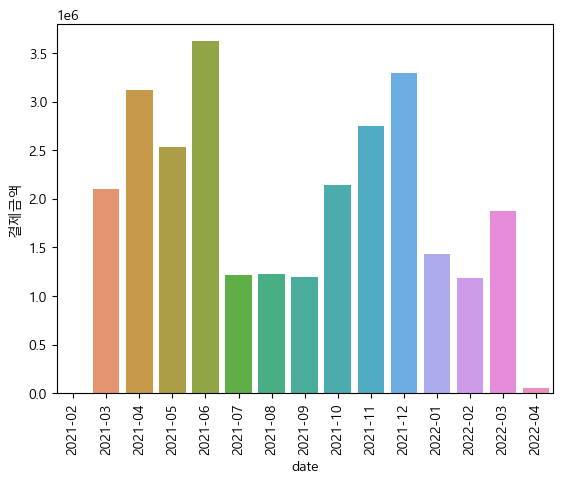

In [135]:
plt.xticks(rotation = 90 )
ax = sns.barplot(data = grouped.reset_index(),x='date',y='결제금액')
plt.show()

In [136]:
# temp_var의 상품명을 value_counts를 이용해 집계하기
sales_item_count= temp_var['상품명'][temp_var['판매수량']!= -1].value_counts()
sales_item_count

김치볶음밥          1204
라면              749
짜장라면            455
치즈불고기볶음밥        420
계란추가            314
               ... 
라면(계란/치즈추가)       1
녹차(HOT)           1
짜장라면(계란추가)        1
이어폰(커널형)          1
오늘은 한돈간장불고기       1
Name: 상품명, Length: 100, dtype: int64

In [137]:
# 집계 결과를 데이터프레임으로 변환하고, 상위 10개 선정하기
sales_item_count = pd.DataFrame(sales_item_count)
sales_item_count[:10]

,상품명
김치볶음밥,1204
라면,749
짜장라면,455
치즈불고기볶음밥,420
계란추가,314
낙지볶음밥,312
새우볶음밥,309
아메리카노(ICE),284
치즈감자튀김,246
감자튀김,242


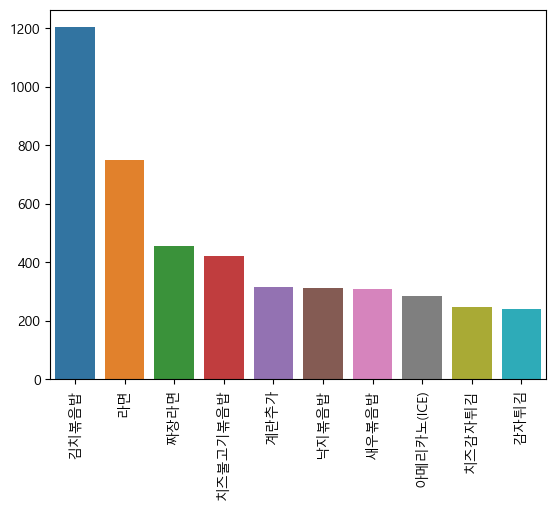

In [138]:
plt.xticks(rotation=90)
ax=sns.barplot(data= sales_item_count[:10].T)
plt.show()

In [108]:
# temp_var의 payment열을 상품명을 기준으로 집계하기
item_payment = temp_var['결제금액'].groupby(temp_var['상품명'][temp_var['판매수량']!= -1]).sum()
item_payment.head()

상품명
(면)계란추가-국물라면          5000
(면)계란후라이 추가-불닭/짜장    20000
(면)치즈추가              10500
(밥)계란후라이 추가           3000
(밥)슈레드치즈추가            4500
Name: 결제금액, dtype: int64

In [96]:
item_payment= item_payment.sort_values(ascending =False)
item_payment_10 = pd.DataFrame(item_payment[:10])
item_payment_10

,결제금액
상품명,
김치볶음밥,6004400
라면,2941500
치즈불고기볶음밥,2292600
짜장라면,2038500
낙지볶음밥,1710700
새우볶음밥,1539800
치즈감자튀김,1354200
감자튀김,1083800
아메리카노(ICE),1058100


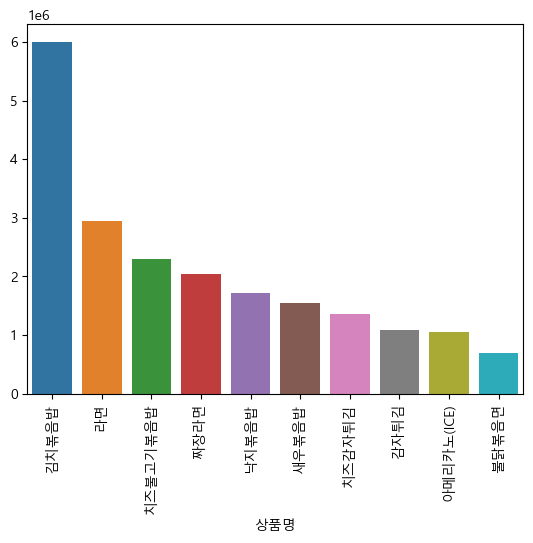

In [67]:
plt.xticks(rotation=90)
ax=sns.barplot(data= item_payment_10.T)
plt.show()

In [69]:
# 활용할 데이터(entry_data)를 temp_var로 정의하기
temp_var = entry_data
temp_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22555 entries, 0 to 22554
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   요금제명    22292 non-null  object
 1   입실      22555 non-null  object
 2   퇴실      22555 non-null  object
 3   이용      22533 non-null  object
 4   위치      22555 non-null  object
 5   금액      22555 non-null  int64 
 6   구분      22555 non-null  object
 7   고객      22555 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.4+ MB


In [85]:
tickets = temp_var['금액'].groupby(temp_var['요금제명']).sum()
tickets = tickets.sort_values(ascending=False)
tickets_10 = pd.DataFrame(tickets[:10])
tickets_10

,금액
요금제명,
한국대생 입장권(종일권),70037000
입장권(종일권),23570500
심야-조조무제한(06시까지),11600000
심야-조조무제한,6221000
한국대생 무제한 입장권,5207500
시간요금제(1시간),2665500
시간요금제(3시간),2042000
무제한 입장권,1568600
18시이후 무제한,1330500


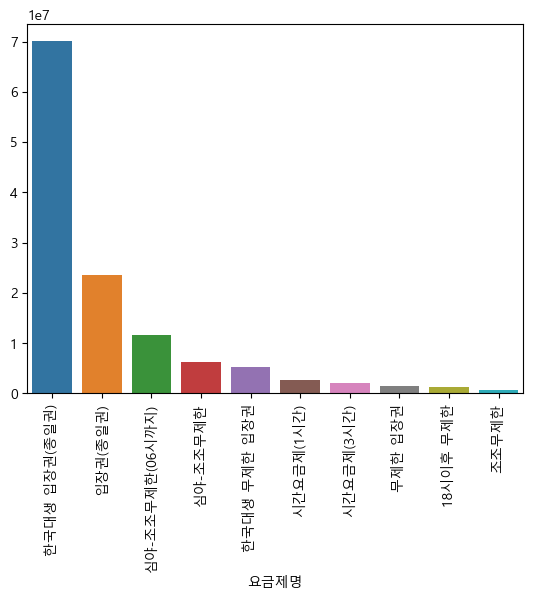

In [88]:
plt.xticks(rotation = 90)
ax=sns.barplot(data = tickets_10.T)
plt.show()

In [161]:
# 매출이 많은 3~5월 입실기록 분류
entry_data['date'] = entry_data['입실'].str[:7]
entry_data
entry_data_03 = pd.DataFrame(entry_data[entry_data['date']=='2021-03'])
entry_data_04 = pd.DataFrame(entry_data[entry_data['date']=='2021-04'])
entry_data_05 = pd.DataFrame(entry_data[entry_data['date']=='2021-05'])
# entry_nv = pd.concat([entry_data_03,entry_data_04,entry_data_05])
# entry_nv= entry_nv.reset_index(drop=True)
# entry_nv

# 매출이 적은 7~9월 입실기록 분류
entry_data_07 = entry_data[entry_data['date']=='2021-07']
entry_data_08 = entry_data[entry_data['date']=='2021-08']
entry_data_09 = entry_data[entry_data['date']=='2021-09']
# entry_v = pd.concat([entry_data_07,entry_data_08,entry_data_09])
# entry_v = entry_v.reset_index(drop=True)
# entry_v

,요금제명,입실,퇴실,이용,위치,금액,구분,고객,date
0,18시이후 무제한,2021-07-31 20:25,2021-07-31 21:52,오전 1:27:00,선불기2,4500,퇴실,customer745742,2021-07
1,18시이후 무제한,2021-07-31 20:25,2021-07-31 21:52,오전 1:27:00,선불기2,4500,퇴실,customer745742,2021-07
2,기간권,2021-07-31 18:50,2021-07-31 21:58,오전 3:08:00,선불기2,0,퇴실,customer490993,2021-07
3,1시간,2021-07-31 18:08,2021-07-31 19:03,오전 12:55:00,선불기2,2500,퇴실,customer345478,2021-07
4,1시간,2021-07-31 18:08,2021-07-31 19:03,오전 12:55:00,선불기2,2500,퇴실,customer345478,2021-07
...,...,...,...,...,...,...,...,...,...
2444,입장권(종일권),2021-09-01 12:49,2021-09-01 17:19,오전 4:30:00,선불기2,6000,퇴실,customer338849,2021-09
2445,입장권(종일권),2021-09-01 11:26,2021-09-01 20:02,오전 8:36:00,선불기2,7500,퇴실,customer971187,2021-09
2446,입장권(종일권),2021-09-01 11:25,2021-09-01 18:44,오전 7:19:00,선불기2,5500,퇴실,customer861314,2021-09
2447,기간권,2021-09-01 9:50,2021-09-01 15:50,오전 6:00:00,선불기2,0,퇴실,customer440840,2021-09


In [179]:
a=pd.DataFrame(entry_nv['입실'].groupby(entry_nv['요금제명']).count())
a

,입실
요금제명,
기간권,229
시간 요금제(1시간당),10
시간권,55
시간요금제(1시간),304
시간요금제(1시간당),9
시간요금제(3시간),72
심야-조조무제한(06시까지),1483
이용권,5
입장권(종일권),981


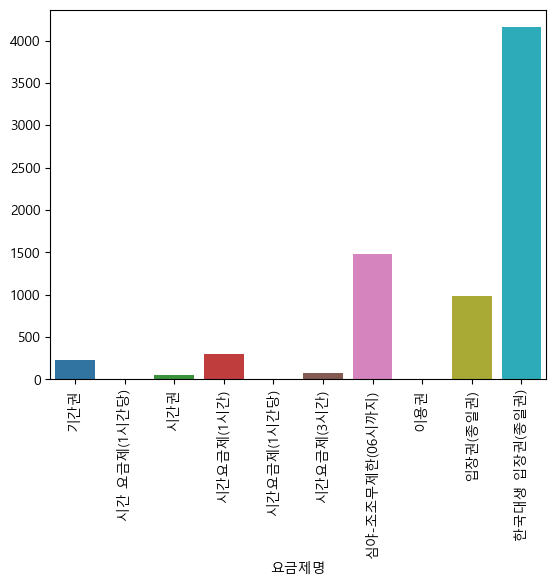

In [178]:
plt.xticks(rotation=90)
ax=sns.barplot(data = a.T)
plt.show()

In [175]:
b=pd.DataFrame(entry_v['입실'].groupby(entry_v['요금제명']).count())
b

,입실
요금제명,
18시이후 무제한,242
1시간,21
3시간,3
기간권,243
시간권,5
시간요금제(1시간),94
시간요금제(3시간),51
심야-조조무제한(06시까지),87
이용권,5


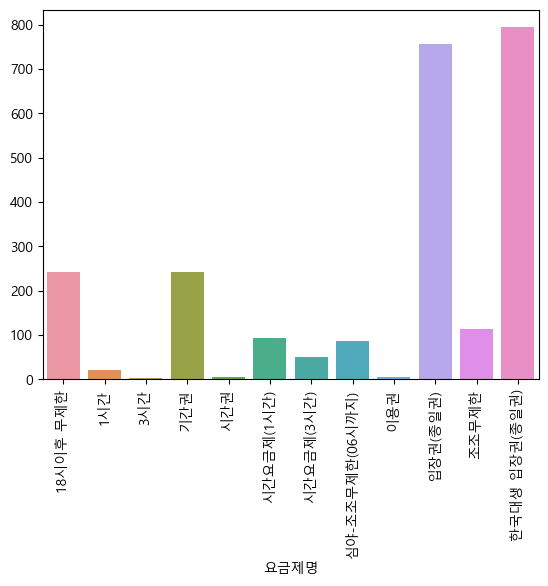

In [177]:
plt.xticks(rotation=90)
ax=sns.barplot(data = b.T)
plt.show()